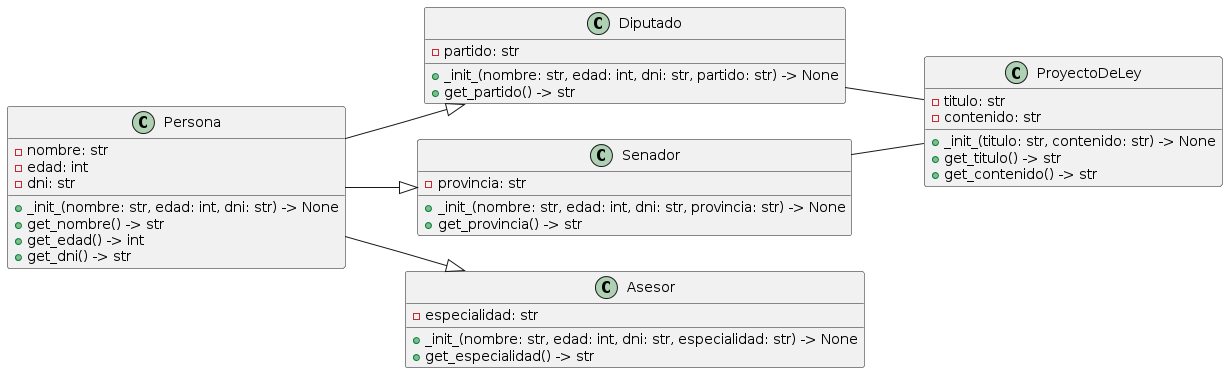

- Modificar la herencia para que Diputado y Senador hereden de Legislador, y no de Persona.

- Agregar una clase de asociación Presentación entre Legislador y ProyectoDeLey. La clase Presentación contendría la fecha en la que el legislador presentó el proyecto de ley.

- Agregar una clase Congreso,  que contenga 0 o varias personas

- La relación de asociación entre Legislador y ProyectoDeLey sería 0..* - 0..*

- La clase Legislador contendrá un nuevo método que permita presentar proyectos de ley, solicitando una fecha y un ProyectoDeLey

- Añadir una relación entre Asesor y Legislador, indicando que Asesor puede trabajar con un legislador

Se han realizado más cambios, están en el código.

In [3]:
from datetime import datetime

class Persona:
    def __init__(self, nombre, edad, dni):
        self.nombre = nombre
        self.edad = edad
        self.dni = dni
        
    def mostrar(self):
        print("Persona:",self.nombre,"-",self.dni)
        
        
    
class Legislador(Persona):
    def __init__(self, nombre, edad, dni):
        super().__init__(nombre, edad, dni)
        self.presentaciones = []
        
    def agregar_presentacion(self, presentacion):
        self.presentaciones.append(presentacion)
        
    def mostrar(self):
        pass
    
    def mostrar_proyectos(self):
        for presentacion in self.presentaciones:
            self.mostrar()
            presentacion.mostrar_proyecto()
    


class Senador(Legislador):
    def __init__(self, provincia, nombre, edad, dni):
        super().__init__(nombre, edad, dni)
        self.provincia = provincia
    
    def mostrar(self):
        print("Senador:",self.nombre,"-",self.dni,"-",self.provincia)
        



class Diputado(Legislador):
    def __init__(self, partido, nombre, edad, dni):
        super().__init__(nombre, edad, dni)
        self.partido = partido
        
    def mostrar(self):
        print("Diputado:",self.nombre,"-",self.dni,"-",self.partido)
            


class Asesor(Persona):
    def __init__(self, especialidad, legislador, nombre, edad, dni):
        super().__init__(nombre, edad, dni)
        self.especialidad = especialidad
        self.legislador = legislador
        
    def mostrar(self):
        print("Asesor:",self.nombre,"-",self.dni,"-",self.especialidad)
        
    


class Congreso:
    def __init__(self, nombre):
        self.nombre = nombre
        self.personas = []
        
    def agregar_persona(self, persona):
        self.personas.append(persona)
        
    def mostrar_proyectos_de_ley(self, legislador: Legislador):
        legislador.mostrar_proyectos()

    


class ProyectoDeLey:
    def __init__(self, titulo, contenido):
        self.titulo = titulo
        self.contenido = contenido
        self.presentaciones = []
        
    def agregar_presentacion(self, presentacion):
        self.presentaciones.append(presentacion)
        
    def obtener_str_proyecto(self):
        return "Proyecto: "+self.titulo+" - "+self.contenido
        
    
class Presentacion:
    def __init__(self, fecha_presentacion, legislador, proyecto_de_ley):
        self.fecha_presentacion = fecha_presentacion
        self.legislador = legislador
        self.proyecto_de_ley = proyecto_de_ley
        
    def mostrar_proyecto(self):
        print(self.proyecto_de_ley.obtener_str_proyecto(),"- Fecha:",self.fecha_presentacion)
        
    
proy1 = ProyectoDeLey("Proyecto 1","Contenido 1")
proy2 = ProyectoDeLey("Proyecto 2","Contenido 2")
proy3 = ProyectoDeLey("Proyecto 3","Contenido 3")
proy4 = ProyectoDeLey("Proyecto 4","Contenido 4")
proy5 = ProyectoDeLey("Proyecto 5","Contenido 5")

congresonacarg = Congreso("Congreso de la Nacion Argentina")

senador = Senador("Santa Fe","Juan Pablo",22,"11111111")
diputado = Diputado("UxP","Fernando",33,"22222222")
congresonacarg.agregar_persona(senador)
congresonacarg.agregar_persona(diputado)

presentacion1 = Presentacion(datetime(1111,11,11),senador,proy1)
presentacion2 = Presentacion(datetime(2222,11,11),senador,proy2)
senador.agregar_presentacion(presentacion1)
proy1.agregar_presentacion(presentacion1)
senador.agregar_presentacion(presentacion2)
proy2.agregar_presentacion(presentacion2)
presentacion3 = Presentacion(datetime(3333,11,11),diputado,proy3)
presentacion4 = Presentacion(datetime(4444,11,11),diputado,proy4)
presentacion5 = Presentacion(datetime(5555,11,11),diputado,proy5)
diputado.agregar_presentacion(presentacion3)
diputado.agregar_presentacion(presentacion4)
diputado.agregar_presentacion(presentacion5)
proy3.agregar_presentacion(presentacion3)
proy4.agregar_presentacion(presentacion4)
proy5.agregar_presentacion(presentacion5)

congresonacarg.mostrar_proyectos_de_ley(diputado)
congresonacarg.mostrar_proyectos_de_ley(senador)



Diputado: Fernando - 22222222 - UxP
Proyecto: Proyecto 3 - Contenido 3 - Fecha: 3333-11-11 00:00:00
Diputado: Fernando - 22222222 - UxP
Proyecto: Proyecto 4 - Contenido 4 - Fecha: 4444-11-11 00:00:00
Diputado: Fernando - 22222222 - UxP
Proyecto: Proyecto 5 - Contenido 5 - Fecha: 5555-11-11 00:00:00
Senador: Juan Pablo - 11111111 - Santa Fe
Proyecto: Proyecto 1 - Contenido 1 - Fecha: 1111-11-11 00:00:00
Senador: Juan Pablo - 11111111 - Santa Fe
Proyecto: Proyecto 2 - Contenido 2 - Fecha: 2222-11-11 00:00:00
